In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [3]:
import pandas as pd

true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

true_df.head()
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df["label"] = 1
fake_df["label"] = 0
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)


df = df.sample(frac=1).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,Trump asks Supreme Court to block travel ban r...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,"July 14, 2017",1
1,"Factbox: Trump's policies on immigration, econ...",(Reuters) - Republican presidential candidate ...,politicsNews,"September 27, 2016",1
2,Trump's Interior Department shortlist vexes em...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"November 21, 2016",1
3,Bob Geldof calls Aung San Suu Kyi 'handmaiden ...,DUBLIN (Reuters) - Irish musician and activist...,worldnews,"November 13, 2017",1
4,BREAKING: Paul Ryan Makes A HUGE Announcement ...,,politics,"Jan 5, 2017",0


In [5]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

df[["text", "clean_text"]].head()


,text,clean_text
0,WASHINGTON (Reuters) - The U.S. Justice Depart...,washington reuters the us justice department o...
1,(Reuters) - Republican presidential candidate ...,reuters republican presidential candidate dona...
2,WASHINGTON (Reuters) - President-elect Donald ...,washington reuters presidentelect donald trump...
3,DUBLIN (Reuters) - Irish musician and activist...,dublin reuters irish musician and activist bob...
4,,


In [6]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4682
           1       0.94      0.94      0.94      4298

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9414
Confusion Matrix:
 [[4421  261]
 [ 265 4033]]


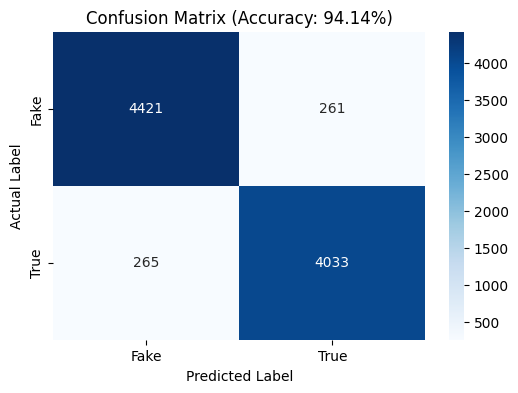

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")
plt.show()
